In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 讀入Fashion Mnist 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
len(x_train),len(x_test)

(60000, 10000)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Shirt


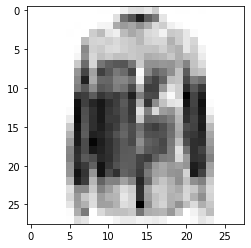

In [7]:
n = 7345
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

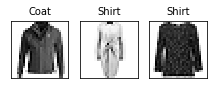

In [10]:
pick = np.random.choice(60000,3,replace=False)

for i in range(3):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [11]:
x_train = x_train/255
y_train = y_train/255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(60000, 784)

In [14]:
y_train.shape

(60000,)

In [15]:
x_test = x_test.reshape(10000, 784)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, 10)

In [18]:
y_test = to_categorical(y_test, 10)

In [19]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [21]:
model = Sequential()

In [22]:
model.add(Dense(67, input_dim = 784, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.0067), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 67)                52595     
_________________________________________________________________
dense_1 (Dense)              (None, 34)                2312      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                350       
Total params: 55,257
Trainable params: 55,257
Non-trainable params: 0
_________________________________________________________________


### Train

In [25]:
model.fit(x_train, y_train, batch_size=50, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0014 - accuracy: 0.9984
Epoch 2/30
60000/60000 [==============================] - 2s 34us/sample - loss: 8.2917e-05 - accuracy: 1.0000
Epoch 3/30
60000/60000 [==============================] - 2s 38us/sample - loss: 4.4318e-05 - accuracy: 1.0000
Epoch 4/30
60000/60000 [==============================] - 2s 34us/sample - loss: 2.9818e-05 - accuracy: 1.0000
Epoch 5/30
60000/60000 [==============================] - 2s 35us/sample - loss: 2.2277e-05 - accuracy: 1.0000
Epoch 6/30
60000/60000 [==============================] - 2s 34us/sample - loss: 1.7697e-05 - accuracy: 1.0000
Epoch 7/30
60000/60000 [==============================] - 2s 34us/sample - loss: 1.4639e-05 - accuracy: 1.0000
Epoch 8/30
60000/60000 [==============================] - 2s 38us/sample - loss: 1.2454e-05 - accuracy: 1.0000
Epoch 9/30
60000/60000 [==============================] - 2s 34us/sample - loss: 1.0816e-05 -

### 成果

In [26]:
result = model.predict_classes(x_test)

In [28]:
result[9999]

0

神經網路預測是: T-shirt/top


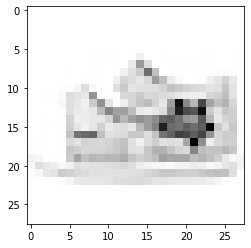

In [29]:
n = 9999
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')